<a href="https://colab.research.google.com/github/christ0089/Tensorflow-SkLearn-Certification-2020/blob/master/Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Performing Basic OCR with MNIST

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
# The 784 represents the features of each image which in this case
# is each pixel of a 28 x 28 Image hence 784 features


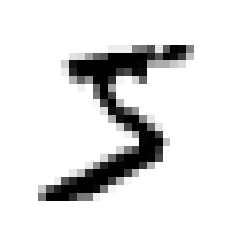

In [4]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
y[0]

'5'

In [6]:
y = y.astype(np.uint8) #Changing all the test to numbers

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == 5) # True for all the 5 in set
y_test_5 = (y_test == 5)

In [7]:
from sklearn.linear_model import SGDClassifier

sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(X_train, y_train_5)

#sdg_clf.predict([some_digit])


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

## Performance Measures for Clasiffiers

###Cross-Validation Custom Implementation

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sdg_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]

    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints”





/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(sdg_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [10]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
      pass
    def predict(self, X):
      return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
# The accuracy of the dataset is 90 percent as the number 5 only represents
# the 10% of the data.
# This is why accuracy is not generally the best metric to meassure classifier
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [11]:
# Confusion Matrix is the way that we measure classifier performance

from sklearn.model_selection import cross_val_predict
# Here we use the folds to make clean predictions from the data.
y_train_pred = cross_val_score(sdg_clf, X_train, y_train, cv=3)
len(y_train_pred)

3

In [12]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

# Confusion Matrices give you the information pretaining the True Positives and
# False Negatives
# This is the presicion of othe classifier

NameError: ignored

## Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # == (4096) / (4096/ 1522) 

In [ ]:
recall_score(y_train_5, y_train_pred) # == (4096) / (4096/ 1325) 
# The results are not very shiny as the model shows a 75 precision
# when classifying 



In [ ]:
# Compute F1 Score, this scoring metric favors classifiers

from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)
#Increasing pression reduces recall and vice versa they are dependent on 
# each ther 

# Reacall Reffers to the number of true negatives 
# Precision reffers to the number of false positives

# To change the threshold of the model to change the way we make predictions

y_scores = sdg_clf.desicion_function([2])
threshold = 0
y_some_digit_pred = (y_scores > threshold) # Returns True

# vs 

threshold = 8000
y_some_digit_pred = (y_scores > threshold) # Returns False

Deciding for Threshold Use

In [ ]:
y_scores = cross_val_predict(sdg_clf, X_train, y_train, cv=3,
                             method="decision_function")

from sklearn.metrics import presicion_recall_curve

# We use precision recall to compute posible thresholds and recalls
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

# Will give the first number with the lowes threshold that gives the 
# 90 percent of presicion
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision) 
# Run Prediction base on the threshold precision
precision_score(y_train_5, y_train_pred_90)


In [ ]:
recall_score(y_train_5, y_train_pred_90)


# ROC Curve

In [ ]:
# Receiver Operating Characteristic another tool for Binary Classifiers

#Plots the True Positive Rate vs the False Postive Rate
#FPR (False Positive Rate) is the ratio of negative instaces that are incorrectly classified
#TNR (Trur Neative Rate) is the ration of negative instaces that are correctly classified

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
save_fig("roc_curve_plot")                         # Not shown
plt.show()

In [ ]:
# To compare the classifiers we use the area under the curve 
# with a perfect classfier being that of 1

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)